# Clean Data

## Importing the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import gzip
from io import StringIO
%matplotlib inline

In [2]:
# This function uses try statements to push through errors and unzip the csv data
def unzip_csv(file_location): 
    file = gzip.open(file_location, 'rb')
    content = file.read()
    file.close()
    try:
        content_str = str(content,'utf-8')
        content_data = StringIO(content_str) 
    except:
        content_str = str(content,'latin-1')
        content_data = StringIO(content_str) 
    try:
        return pd.read_csv(content_data)
    except:
        return pd.read_csv(content_data, sep='\t')

In [3]:
#for copy paste purposes
!ls -la zippedData/

total 45724
drwxr-xr-x 1 Jesus Baquiax 197609        0 Jun 21 12:56 .
drwxr-xr-x 1 Jesus Baquiax 197609        0 Jun 21 13:00 ..
-rw-r--r-- 1 Jesus Baquiax 197609    53544 Jun 21 12:56 bom.movie_gross.csv.gz
-rw-r--r-- 1 Jesus Baquiax 197609 18070960 Jun 21 12:56 imdb.name.basics.csv.gz
-rw-r--r-- 1 Jesus Baquiax 197609  5599979 Jun 21 12:56 imdb.title.akas.csv.gz
-rw-r--r-- 1 Jesus Baquiax 197609  3459897 Jun 21 12:56 imdb.title.basics.csv.gz
-rw-r--r-- 1 Jesus Baquiax 197609  1898523 Jun 21 12:56 imdb.title.crew.csv.gz
-rw-r--r-- 1 Jesus Baquiax 197609 12287583 Jun 21 12:56 imdb.title.principals.csv.gz
-rw-r--r-- 1 Jesus Baquiax 197609   539530 Jun 21 12:56 imdb.title.ratings.csv.gz
-rw-r--r-- 1 Jesus Baquiax 197609   498202 Jun 21 12:56 rt.movie_info.tsv.gz
-rw-r--r-- 1 Jesus Baquiax 197609  3402194 Jun 21 12:56 rt.reviews.tsv.gz
-rw-r--r-- 1 Jesus Baquiax 197609   827840 Jun 21 12:56 tmdb.movies.csv.gz
-rw-r--r-- 1 Jesus Baquiax 197609   153218 Jun 21 12:56 tn.movie_budgets.csv.gz


In [4]:
#hard-coding the file-locations and nicknames into a dict for future reference
#Console commands like !ls -la zippedData give a great place to copy pase this

file_locations = [
    'zippedData/bom.movie_gross.csv.gz'
    ,'zippedData/imdb.name.basics.csv.gz'
    ,'zippedData/imdb.title.akas.csv.gz'
    ,'zippedData/imdb.title.basics.csv.gz'
    ,'zippedData/imdb.title.crew.csv.gz'
    ,'zippedData/imdb.title.principals.csv.gz'
    ,'zippedData/imdb.title.ratings.csv.gz'
    ,'zippedData/rt.movie_info.tsv.gz'
    ,'zippedData/rt.reviews.tsv.gz'
    ,'zippedData/tmdb.movies.csv.gz'
    ,'zippedData/tn.movie_budgets.csv.gz'
]

file_nicknames = [
    'gross'
    ,'name'
    ,'akas'
    ,'basics'
    ,'crew'
    ,'principals'
    ,'ratings'
    ,'info'
    ,'reviews'
    ,'movies'
    ,'budget']


#this dicitonary comprehension uses a zip function to smush the two lists together and then parse them into a dict
#we also have a reference for each raw df and its location on the drive.

file_dict = {k:v for k,v in zip(file_nicknames,file_locations)}

In [5]:
#Importing all the data, commented out data we didn't use

#gross = unzip_csv(file_dict['gross'])
name = unzip_csv(file_dict['name'])
#akas = unzip_csv(file_dict['akas'])
basics = unzip_csv(file_dict['basics'])
#crew = unzip_csv(file_dict['crew'])
#principals = unzip_csv(file_dict['principals'])
#ratings = unzip_csv(file_dict['ratings'])
#info = unzip_csv(file_dict['info'])
#reviews = unzip_csv(file_dict['reviews'])
#movies = unzip_csv(file_dict['movies'])
budgets = unzip_csv(file_dict['budget'])

## Cleaning the Data

In [6]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [8]:
#id column is a redundant index so we're dropping it

budgets.drop('id', axis=1, inplace=True)

In [9]:
#setting date column to datatime object for use in charts etc.

budgets['release_date'] = pd.to_datetime(budgets['release_date'])

In [10]:
#stripping any unseen or unknown whitespace from the object locales

budgets.columns.str.strip()
budgets['movie'] = budgets['movie'].str.strip()

In [11]:
#this function launders the money ;D

def clean_money(budgets_series):
    #the map function applys the .replace to each cell in the given series, x[1:] skips the $
    
    return budgets_series.map(lambda x: int(x[1:].replace(',','')))

In [12]:
budgets['production_budget'] = clean_money(budgets['production_budget'])
budgets['domestic_gross'] = clean_money(budgets['domestic_gross'])
budgets['worldwide_gross'] = clean_money(budgets['worldwide_gross']);

In [13]:
#looks good

budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   int64         
 3   domestic_gross     5782 non-null   int64         
 4   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 226.0+ KB


In [14]:
basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [15]:
basics.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [16]:
basics['movie'] = basics['primary_title']

In [17]:
#we only wanted genres titles, and ttconst for matching to the other file

basics.drop(['primary_title','original_title','start_year'
                ,'runtime_minutes'],axis=1,inplace=True)

In [18]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tconst  146144 non-null  object
 1   genres  140736 non-null  object
 2   movie   146144 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [19]:
#the strip functions remove unwanted whitespace if its lurking in there

basics.columns = basics.columns.str.strip()

for column in list(basics.columns):
    basics[column] = basics[column].str.strip()

In [20]:
#the dataframe below proivdes a list of indices that contain a null value in the genre column
#the genre column is very important to our analysis so we'll drop null values

to_drop = basics[basics['genres'].isna()==True].index


#simple drop function will finish the job

basics.drop(to_drop,inplace=True)

In [21]:
#this .map will apply a .split to all the genres at each "," creating lists within the df

basics['genres'] = basics['genres'].map(lambda x: x.split(","))

In [22]:
basics['genres'][0]

['Action', 'Crime', 'Drama']

In [23]:
basics['genres'][0][1]

'Crime'

In [24]:
name.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [25]:
#dropping these since they're outside the scope of our analysis

name.drop(['nconst','birth_year','death_year',],axis=1,inplace=True)

In [26]:
name.isnull().sum()

primary_name              0
primary_profession    51340
known_for_titles      30204
dtype: int64

In [27]:
#this phrase finds null values in either column

to_drop = name[(name['primary_profession'].isna()==True)|
               name['known_for_titles'].isna()==True].index

In [28]:
name.drop(to_drop,inplace=True)

In [29]:
#splitting the nested data

name['known_for_titles'] = name['known_for_titles'].map(lambda x: x.split(","))
name['primary_profession'] = name['primary_profession'].map(lambda x: x.split(","));

In [30]:
name['known_for_titles'][0][0]              

'tt0837562'

In [176]:
# QUESTION 3
# Does the average ROI by genre follow a similar trend when compared between domestic and foreign markets?


In [97]:
# merge 'genres' column from basics DF to budgets DF using the 'movie' column

merged_df = pd.merge(budgets, basics, on='movie')
merged_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres
0,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,[Horror]
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"[Action, Adventure, Fantasy]"
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,"[Action, Adventure, Sci-Fi]"
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"[Action, Adventure, Sci-Fi]"
4,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...,...,...
3738,2006-04-28,Clean,10000,138711,138711,tt6619196,"[Comedy, Drama, Horror]"
3739,2001-07-06,Cure,10000,94596,94596,tt1872026,[Drama]
3740,2012-01-13,Newlyweds,9000,4584,4584,tt1880418,"[Comedy, Drama]"
3741,2018-12-31,Red 11,7000,0,0,tt7837402,"[Horror, Sci-Fi, Thriller]"


In [98]:
# isolate the release year

merged_df['release_year'] = pd.DatetimeIndex(merged_df['release_date']).year
merged_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres,release_year
0,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,[Horror],2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"[Action, Adventure, Fantasy]",2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,"[Action, Adventure, Sci-Fi]",2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"[Action, Adventure, Sci-Fi]",2015
4,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"[Action, Adventure, Sci-Fi]",2018
...,...,...,...,...,...,...,...,...
3738,2006-04-28,Clean,10000,138711,138711,tt6619196,"[Comedy, Drama, Horror]",2006
3739,2001-07-06,Cure,10000,94596,94596,tt1872026,[Drama],2001
3740,2012-01-13,Newlyweds,9000,4584,4584,tt1880418,"[Comedy, Drama]",2012
3741,2018-12-31,Red 11,7000,0,0,tt7837402,"[Horror, Sci-Fi, Thriller]",2018


In [127]:
#separate each genre of a movie into their own row
exploded_df = merged_df.explode('genres')
exploded_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres,release_year
0,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,Horror,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Action,2011
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Adventure,2011
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Fantasy,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,Action,2019
...,...,...,...,...,...,...,...,...
3741,2018-12-31,Red 11,7000,0,0,tt7837402,Sci-Fi,2018
3741,2018-12-31,Red 11,7000,0,0,tt7837402,Thriller,2018
3742,2015-09-29,A Plague So Pleasant,1400,0,0,tt2107644,Drama,2015
3742,2015-09-29,A Plague So Pleasant,1400,0,0,tt2107644,Horror,2015


In [133]:
# add domestic profit and worldwide profit and ROI
exploded_df['domestic_profit'] = exploded_df['domestic_gross'] - exploded_df['production_budget']
exploded_df['international_profit'] = (exploded_df['worldwide_gross']- exploded_df['domestic_gross']) - exploded_df['production_budget']
exploded_df['roi'] = exploded_df['worldwide_gross'] - exploded_df['production_budget']



In [180]:
# Filter out movies older than 2011
year_filtered_df = exploded_df.loc[(exploded_df['release_year'] > 2010)]
year_filtered_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres,release_year,domestic_profit,international_profit,roi
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Action,2011,-169536125,394000000,635063875
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Adventure,2011,-169536125,394000000,635063875
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Fantasy,2011,-169536125,394000000,635063875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,Action,2019,-307237650,-243000000,-200237650
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,Adventure,2019,-307237650,-243000000,-200237650


In [135]:
#create an new dataframe with specific columns
graphable_df = year_filtered_df[['release_year', 'genres', 'domestic_profit', 'international_profit','roi']].copy()

graphable_df

,release_year,genres,domestic_profit,international_profit,roi
1,2011,Action,-169536125,394000000,635063875
1,2011,Adventure,-169536125,394000000,635063875
1,2011,Fantasy,-169536125,394000000,635063875
2,2019,Action,-307237650,-243000000,-200237650
2,2019,Adventure,-307237650,-243000000,-200237650
...,...,...,...,...,...
3741,2018,Sci-Fi,-7000,-7000,-7000
3741,2018,Thriller,-7000,-7000,-7000
3742,2015,Drama,-1400,-1400,-1400
3742,2015,Horror,-1400,-1400,-1400


In [177]:
# group dataframe by genres and sum all columns
grouped_by_genres = graphable_df.groupby('genres').sum()
grouped_by_genres

,release_year,domestic_profit,international_profit,roi
genres,,,,
Action,1039538,2386664793,32387761188,70024823354
Adventure,767648,4615358075,39306102543,79793541618
Animation,227665,3551015667,14028142364,27219458031
Biography,366752,1933957868,2364157931,9029820545
Comedy,1216600,9139203118,17561060636,47306780927
Crime,588192,705334363,3168899238,12037866974
Documentary,455246,1916626769,2951931130,10766915272
Drama,2284305,6077774631,13076703057,46376056880
Family,211523,1545090761,4990223538,12837689299


In [146]:
#get top genres sorted by ROI
roi_genres = grouped_by_genres.sort_values(by=['roi'], ascending = False)
roi_genres.head(10)

,release_year,domestic_profit,international_profit,roi
genres,,,,
Adventure,767648,4615358075,39306102543,79793541618
Action,1039538,2386664793,32387761188,70024823354
Comedy,1216600,9139203118,17561060636,47306780927
Drama,2284305,6077774631,13076703057,46376056880
Sci-Fi,336423,4119813092,16644285071,33436962536
Animation,227665,3551015667,14028142364,27219458031
Thriller,779553,2784294518,10345024647,23518754611
Fantasy,282044,539359343,10478089287,21750398630
Family,211523,1545090761,4990223538,12837689299


In [168]:
#isolate genres from original dataframe
adventure_df = year_filtered_df.loc[(year_filtered_df['genres'] == 'Adventure')]

action_df = year_filtered_df.loc[(year_filtered_df['genres'] == 'Action')]

comedy_df = year_filtered_df.loc[(year_filtered_df['genres'] == 'Comedy')]

drama_df = year_filtered_df.loc[(year_filtered_df['genres'] == 'Drama')]

scifi_df = year_filtered_df.loc[(year_filtered_df['genres'] == 'Sci-Fi')]

In [181]:
#group by year
adv2 = adventure_df.groupby('release_year').sum()

act2 = action_df.groupby('release_year').sum()

com2 = comedy_df.groupby('release_year').sum()

dra2 = drama_df.groupby('release_year').sum()

sf2 = scifi_df.groupby('release_year').sum()


,production_budget,domestic_gross,worldwide_gross,domestic_profit,international_profit,roi
release_year,,,,,,
2011,1114045000,1412047412,3553969385,298002412,1027876973,2439924385
2012,1377935000,1738041639,4441000150,360106639,1325023511,3063065150
2013,1676720000,2260098271,5876320834,583378271,1939502563,4199600834
2014,1870907373,2323654405,7209623490,452747032,3015061712,5338716117
2015,1453500000,2089223916,5646776053,635723916,2104052137,4193276053
2016,1174000000,1650530369,4100112999,476530369,1275582630,2926112999
2017,1480250000,1547898011,4487254701,67648011,1459106690,3007004701
2018,1740507000,2979609560,8608002022,1239102560,3887885462,6867495022
2019,785000000,791573882,2186767275,6573882,610193393,1401767275


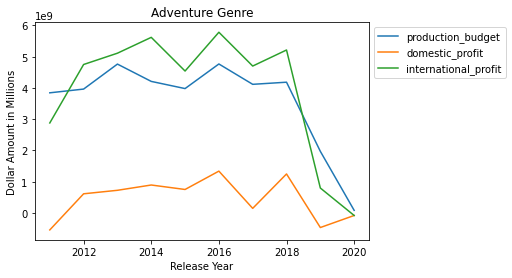

In [207]:
# plot the dataframes
adv2.loc[:,['production_budget', 'domestic_profit', 'international_profit']].plot();
plt.xlabel('Release Year')
plt.ylabel('Dollar Amount in Millions')
plt.title('Adventure Genre')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

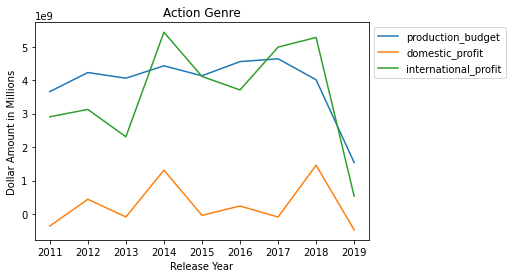

In [203]:
act2.loc[:,['production_budget', 'domestic_profit', 'international_profit']].plot();
plt.xlabel('Release Year')
plt.ylabel('Dollar Amount in Millions')
plt.title('Action Genre');
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

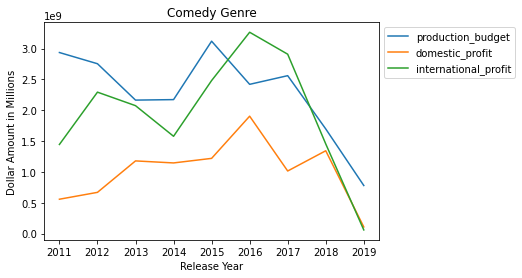

In [204]:
com2.loc[:,['production_budget', 'domestic_profit', 'international_profit']].plot();
plt.xlabel('Release Year')
plt.ylabel('Dollar Amount in Millions')
plt.title('Comedy Genre');
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

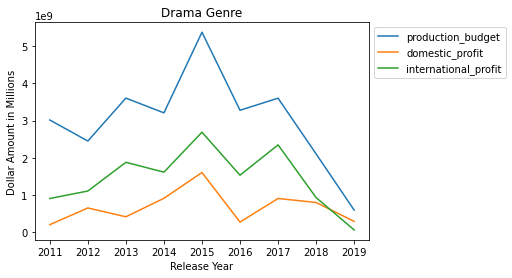

In [205]:
dra2.loc[:,['production_budget', 'domestic_profit', 'international_profit']].plot();
plt.xlabel('Release Year')
plt.ylabel('Dollar Amount in Millions')
plt.title('Drama Genre');
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

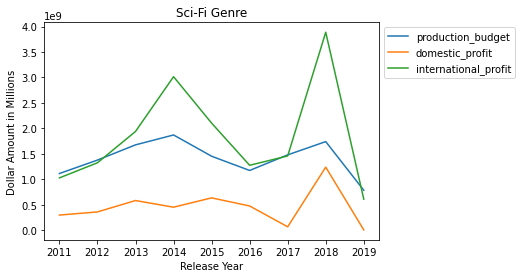

In [206]:
sf2.loc[:,['production_budget', 'domestic_profit', 'international_profit']].plot();
plt.xlabel('Release Year')
plt.ylabel('Dollar Amount in Millions')
plt.title('Sci-Fi Genre');
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)